In [1]:
from src.file_converter import (
    convert_doc_with_image_annotation,
    chunk_markdown_by_headers,
)

d:\DesktopFiles\NextJsProjects\BunxTest\conversational-tutoring-system\doc-processing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
markdownDocument = convert_doc_with_image_annotation("docs/test-document-2.pdf")

2025-12-16 01:59:30,286 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-16 01:59:36,128 - INFO - Going to convert document batch...
2025-12-16 01:59:36,132 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 5bc1909d1e8430ba75d1da6a9ed3bb9e
2025-12-16 01:59:36,183 - INFO - Loading plugin 'docling_defaults'
2025-12-16 01:59:36,208 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-12-16 01:59:36,230 - INFO - Loading plugin 'docling_defaults'
2025-12-16 01:59:36,282 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-12-16 01:59:36,699 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-12-16 01:59:36,701 - INFO - easyocr cannot be used because it is not installed.
2025-12-16 01:59:39,405 - INFO - Accelerator device: 'cpu'
[INFO] 2025-12-16 01:59:39,535 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-12-16 01:59:39,585 [RapidOCR] device_config.py:50: Usi

In [3]:
chunkedMarkdownDocument = chunk_markdown_by_headers(markdownDocument.document.export_to_markdown())
textsList = [ chunk for chunk in chunkedMarkdownDocument]

In [4]:

# markdownWithImageRef = export_to_md_with_image_ref(markdownDocument)
picturesList = markdownDocument.document.pictures
imageAnnotationsList = [el.annotations[0].text for el in picturesList if len(el.annotations)>0]
print(imageAnnotationsList)

['The image presents a comprehensive flowchart illustrating the process of addressing queries through a combination of knowledge graph (KG) references, web pages, and reasoning. The flowchart begins with a query, which is then evaluated by an Attribute Predictor to determine if it is dynamic. If deemed dynamic, the output is "I don\'t know." Conversely, if the query is not dynamic, it proceeds through three primary paths: LLM Direct Answer, LLM Knowledge Reference, and a more intricate reasoning process. The LLM Direct Answer and LLM Knowledge Reference paths are straightforward, whereas the reasoning process involves multiple steps. Initially, KG References, Web Pages, and Raw References are utilized to extract relevant information through various extractors, resulting in KG Triplet, Text Chunks, and Table Chunks. These outputs are then processed by a Numerical Calculator and Expression modules to generate Expressions and Calculation Results. Ultimately, the Reasoning Module integrate

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2224\1864593035.py:3: DeprecationWarning: Field `annotations` is deprecated; use `meta` instead.
  imageAnnotationsList = [el.annotations[0].text for el in picturesList if len(el.annotations)>0]


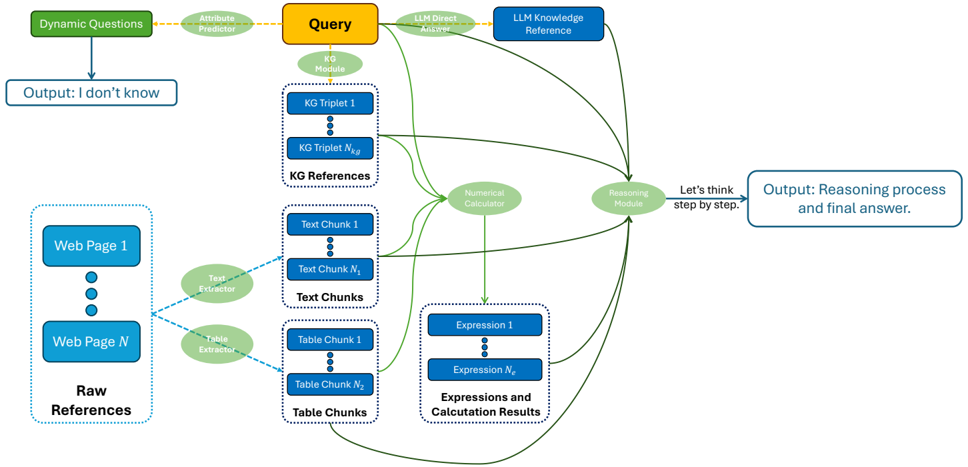

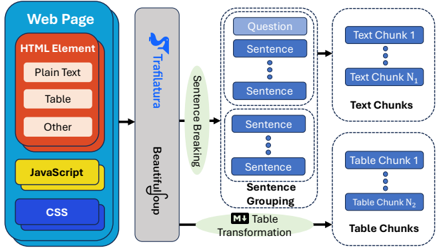

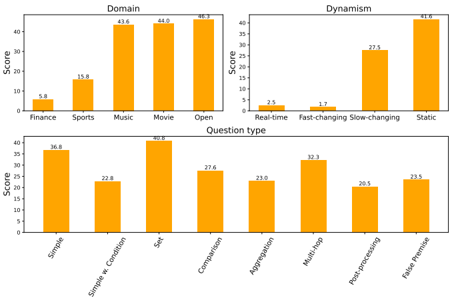

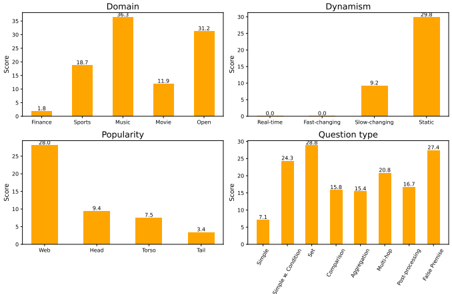

In [ ]:
# Utilities for working with images
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

base64ImageList = [str(img.image.uri).split(",",1)[1] for img in picturesList]

def convert_base64_to_image(imageString):
	imageBytes = base64.b64decode(imageString)
	display(Image.open(BytesIO(imageBytes)))

In [24]:
# Separating tables
hasSeparatedTablesFromDocument = markdownDocument.document.tables
tablesList = [table.export_to_html(doc=markdownDocument.document) for table in hasSeparatedTablesFromDocument]

In [25]:
# Text and Table Summaries
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [26]:
promptText = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additional comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}
"""
prefixPrompt = ChatPromptTemplate.from_template(promptText)
model = ChatGroq(temperature=0.5,model="llama-3.1-8b-instant")
summarizerChain = {"element": lambda x:x} | prefixPrompt | model | StrOutputParser()

In [27]:
textSummaries = summarizerChain.batch(textsList, {'max_concurrency': 1})
tableSummaries = summarizerChain.batch(tablesList, {'max_concurrency': 1})
print(textSummaries)
print(tableSummaries)

2025-12-16 02:27:33,136 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:33,358 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:33,553 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:33,810 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:33,997 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:34,186 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:34,364 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:34,574 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 02:27:34,748 - INFO - HTTP Request: POST http

['A hybrid RAG (Retrieval-Augmented Generation) system is proposed to improve complex reasoning capabilities.', 'Ye Yuan is an individual affiliated with the State Key Laboratory of Multimedia Information Processing at Peking University in Beijing, China.', "Gongbo Sun is a researcher at the University of Wisconsin-Madison's School of Computer, Data & Information Sciences, with contact email gsun43@wisc.edu.", 'A hybrid Retrieval-Augmented Generation (RAG) system is introduced, enhanced through optimizations to improve retrieval quality, reasoning capabilities, and numerical computation ability. The system is evaluated on the CRAG dataset and achieves significant improvements in accuracy and error rates compared to a baseline model, securing top rankings in a KDD Cup 2024 competition.', 'Chengwu Liu is an associate of the PKU-Anker Embodied AI Lab at Peking University in Beijing, China.', "Siqi Li is a researcher at Peking University's School of Computer Science and PKU-Anker Embodied 

In [36]:
# Setting up the vector store (Using Qdrant)
import getpass
import os
from qdrant_client.models import Distance, VectorParams
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from langchain_google_genai import GoogleGenerativeAIEmbeddings

if not os.environ.get("GOOGLE_API_KEY"):
	os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")

QDRANT_URL = os.getenv("QDRANT_URL")
QDRANT_API_KEY = os.getenv("QDRANT_API_KEY")
client = QdrantClient(url=QDRANT_URL, api_key=QDRANT_API_KEY, timeout=30)

vector_size = len(embeddings.embed_query("sample text"))

if not client.collection_exists("conversational_tutoring"):
    client.create_collection(
        collection_name="conversational_tutoring",
        vectors_config=VectorParams(size=vector_size, distance=Distance.COSINE)
    )
vectorStore = QdrantVectorStore(
    client=client,
    collection_name="conversational_tutoring",
    embedding=embeddings,
)

2025-12-16 02:38:55,584 - INFO - HTTP Request: GET https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333 "HTTP/1.1 200 OK"
2025-12-16 02:38:56,472 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 02:38:57,130 - INFO - HTTP Request: GET https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/exists "HTTP/1.1 200 OK"
2025-12-16 02:38:57,571 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring "HTTP/1.1 200 OK"
2025-12-16 02:38:57,799 - INFO - HTTP Request: GET https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring "HTTP/1.1 200 OK"
2025-12-16 02:38:58,227 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/mo

In [37]:
from typing import Any, List, Optional
import uuid
import json
from pathlib import Path
from langchain_classic.storage import LocalFileStore
from langchain_core.documents import Document
from langchain_core.retrievers import BaseRetriever
# The storage layer for the parent documents
root_path = Path.cwd()/"data"
store = LocalFileStore(root_path) # Using file-based store for persistence, could also use in-memory store
idKey = "doc_id"

def serialize_document(doc: Document) -> bytes:
    return json.dumps({
        "page_content": doc.page_content,
        "metadata": doc.metadata
    }).encode("utf-8")
def deserialize_document(data: Optional[bytes])-> Optional[Document]:
    if data is None:
        return None
    obj = json.loads(data.decode("utf-8"))
    return Document(page_content=obj["page_content"], metadata=obj.get("metadata", {}))

class MultiVectorRetriever(BaseRetriever): # langchain compatible implementation
    vectorstore: Any
    docstore: Any
    id_key: str
    k: int = 10

    def _get_relevant_documents(self, query: str) -> List[Document]:
        sub_docs = self.vectorstore.similarity_search(query, k=self.k)

        parent_ids = []
        for doc in sub_docs:
            if self.id_key not in doc.metadata:
                raise ValueError(f"Missing `{self.id_key}` in document metadata")
            parent_ids.append(doc.metadata[self.id_key])

        # Deduplicate (preserve order)
        seen = set()
        parent_ids = [x for x in parent_ids if not (x in seen or seen.add(x))]

        parent_docs = self.docstore.mget(parent_ids)
        return [deserialize_document(data) for data in parent_docs if data is not None]
        # return [doc for doc in parent_docs if doc is not None]

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorStore,
    docstore=store,
    id_key=idKey,
)

In [38]:
# Inserting the summarized texts and original_texts to vector-store and document-store respectively

docIds = [str(uuid.uuid4()) for _ in textsList]
summaryTexts = [
    Document(page_content=summary, metadata={idKey: docIds[i]}) for i, summary in enumerate(textSummaries)
]
retriever.vectorstore.add_documents(summaryTexts)
retriever.docstore.mset([(doc_id, serialize_document(doc)) for doc_id, doc in zip(docIds, textsList)])

# Add table-summaries and table-in-html format to the vector and document store respectively
tableIds = [str(uuid.uuid4()) for _ in tablesList]
summaryTables = [
    Document(page_content=summary, metadata={idKey: tableIds[i]}) for i, summary in enumerate(tableSummaries)
]
tablesDoc = [Document(page_content=html_table, metadata={idKey: tableIds[i]}) for i, html_table in enumerate(tablesList)]
retriever.vectorstore.add_documents(summaryTables)
retriever.docstore.mset([(doc_id, serialize_document(doc)) for doc_id, doc in (zip(tableIds, tablesDoc))])

# Add image summaries and base64 images to their respective stores
imgIds = [str(uuid.uuid4()) for _ in imageAnnotationsList]
summaryImgs = [
    Document(page_content=summary, metadata={idKey: imgIds[i]}) for i, summary in enumerate(imageAnnotationsList)
]
imgsDoc = [Document(page_content=base64String, metadata={idKey: imgIds[i], "type": "image"}) for i, base64String in enumerate(base64ImageList)]
retriever.vectorstore.add_documents(summaryImgs)
retriever.docstore.mset([(doc_id, serialize_document(doc)) for doc_id, doc in zip(imgIds, imgsDoc)])

2025-12-16 02:39:05,633 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 02:39:08,697 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/points?wait=true "HTTP/1.1 200 OK"
2025-12-16 02:39:09,496 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 02:39:09,899 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/points?wait=true "HTTP/1.1 200 OK"
2025-12-16 02:39:10,539 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 02:39:10,925 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e7

In [ ]:
# Testing out the retrieval
docs = retriever._get_relevant_documents(
    "explain webpage processing")
for doc in docs:
    print("\n\n" + "-" * 80)
    if "type" in doc.metadata and doc.metadata["type"] == "image":
        convert_base64_to_image(doc.page_content)
    else:
        print(doc.page_content)